## 1. Importing Required Libraries
1. **pandas (pd):** Used for data manipulation and analysis.

2. **numpy (np):** Used for numerical operations, such as computing z-scores.

3. **matplotlib.pyplot (plt):** Used for static visualizations.

4. **seaborn (sns):** Enhances data visualization with statistical graphs.

5. **plotly.express & plotly.graph_objects:** Used for interactive visualizations, including 3D scatter plots.

6. **scipy.stats (stats):** Used for statistical operations like computing Z-scores.

7. **sklearn.impute.SimpleImputer:** Handles missing values.

8. **sklearn.preprocessing (LabelEncoder, StandardScaler, MinMaxScaler):**

    a. LabelEncoder: Converts categorical labels into numbers.<br>

    b. StandardScaler: Standardizes features (mean=0, variance=1).<br>
    
    c. MinMaxScaler: Normalizes data within a range (0 to 1).
    
9. **sklearn.ensemble.IsolationForest:** Detects outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

## 2. Loading and Inspecting Dataset
df = pd.read_csv(): Loads the Cars93 dataset, which contains information about house prices and related factors.

df.info(): Displays column names, non-null values, and data types.

df.head(): Displays the first 5 rows of the dataset.

In [2]:
# Load a dataset with missing values and categorical inconsistencies
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv")

# Display basic structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             55 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 
 16  Fuel.tank.

## 3. Handling Missing Values
Checks for missing values in each column.

Uses the median value to fill missing data.

fit_transform() applies imputation to all values in the DataFrame.

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64


In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


## 4. Removing Duplicate Records
Ensures no duplicate rows exist in the dataset.

In [5]:
# Remove duplicates
df = df.drop_duplicates()

## 5. Standardizing Categorical Variables
If categorical (non-numeric) columns exist, Label Encoding is applied.<br><br>
Converts text values (e.g., "Yes", "No") into numeric values (e.g., 0, 1).<br>

Converts categorical variables into numerical representations using LabelEncoder.

Stores original values in a new column (_original) for reference.

In [6]:
# Standardize categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_original"] = df[col]  # Keep a copy before encoding
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## 6. Feature Scaling
Applies MinMax Scaling to transform values between 0 and 1.

In [7]:
# Feature Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## 7. Outlier Detection Using Z-Score

Computes the Z-score for each value.<br>

Removes rows where any column has a Z-score above 3 (outlier threshold).

In [8]:
# Outlier detection using Z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]


# 9. Univariate Analysis


## Histogram 
Plots the distribution of the Horsepower feature using a histogram with a Kernel Density Estimate (KDE).

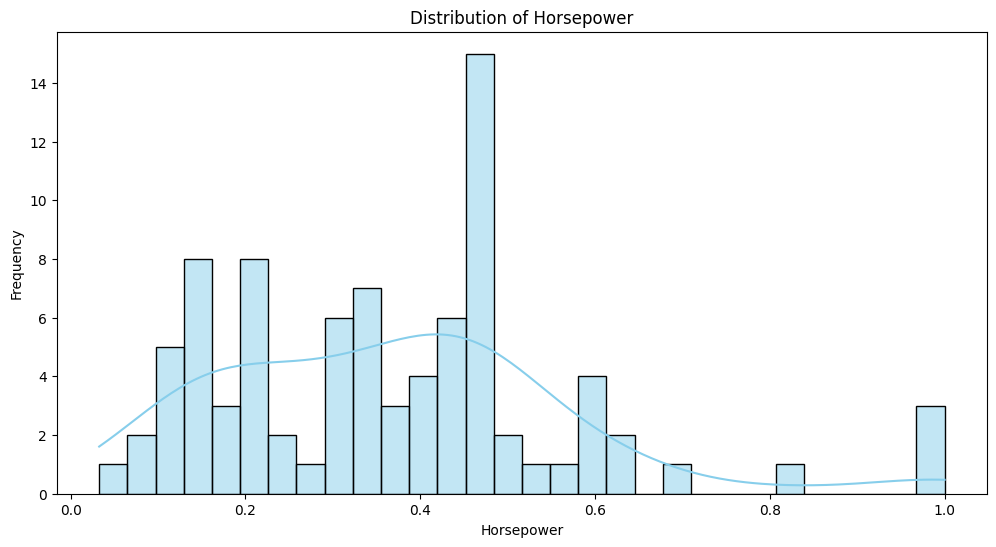

In [9]:
# Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(12,6))
sns.histplot(df['Horsepower'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.show()

## Summary Statistics
Computes statistical measures like mean, median, variance, and skewness.

In [10]:
# Summary statistics
print(df.describe().T)

                    count       mean        std       min        25%  \
Manufacturer         86.0  13.767442   8.738925  0.000000   6.000000   
Model                86.0  45.720930  26.394586  0.000000  24.250000   
Type                 86.0   2.244186   1.548708  0.000000   1.000000   
Min.Price            86.0   0.244937   0.203421  0.002584   0.065891   
Price                86.0   0.215682   0.148783  0.000000   0.108716   
Max.Price            86.0   0.181402   0.119616  0.000000   0.095007   
MPG.city             86.0   0.207427   0.140526  0.000000   0.096774   
MPG.highway          86.0   0.288760   0.141108  0.000000   0.200000   
AirBags              86.0   0.825581   0.381695  0.000000   1.000000   
DriveTrain           86.0   1.046512   0.506591  0.000000   1.000000   
Cylinders            86.0   1.918605   1.150091  0.000000   1.000000   
EngineSize           86.0   0.357496   0.213012  0.042553   0.212766   
Horsepower           86.0   0.369435   0.201642  0.032653   0.22

## Boxplot for Outlier Detection
Identifies outliers across all numerical columns.

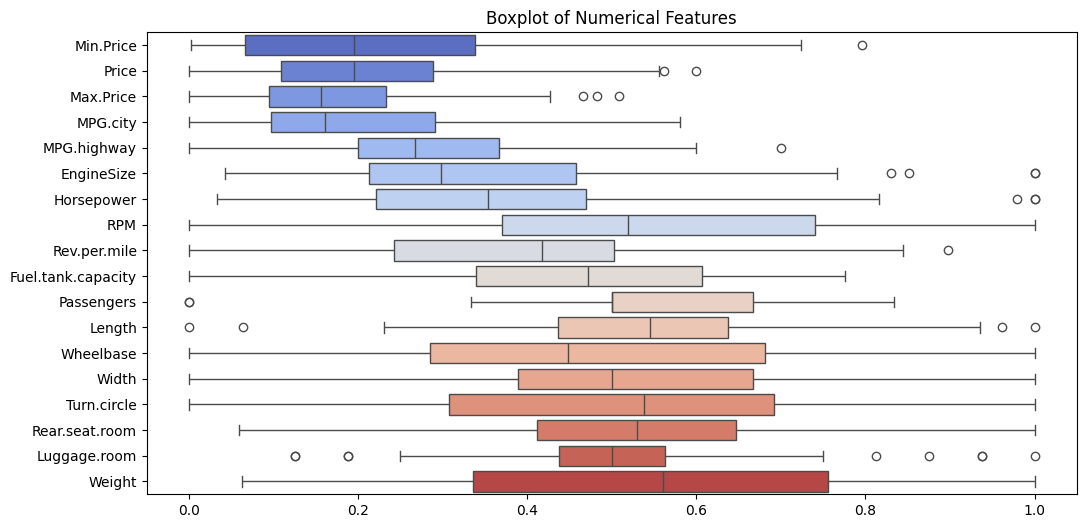

In [11]:
# Boxplot for univariate outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.show()

## Categorical Data Distribution
Plots bar charts to visualize frequency distribution of categorical variables.

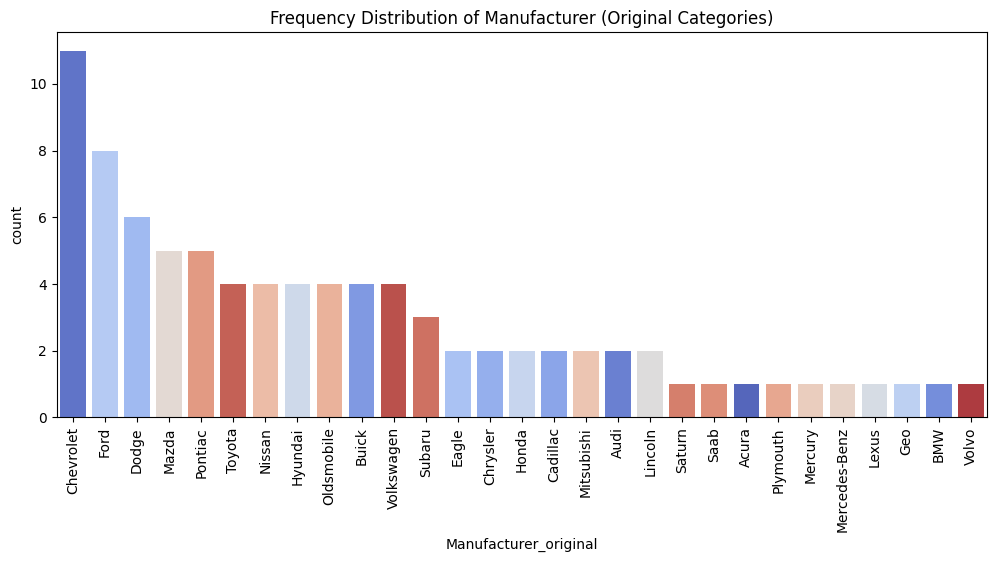

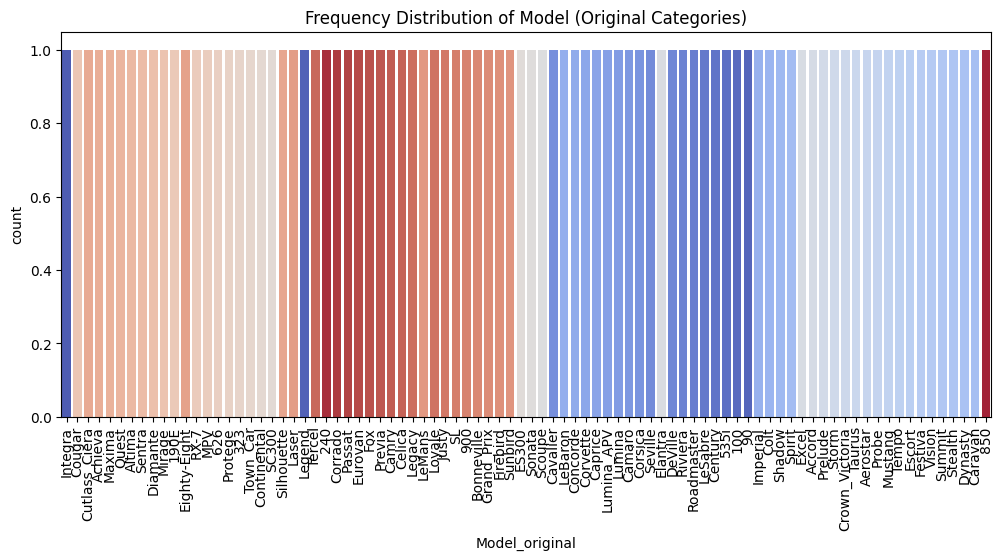

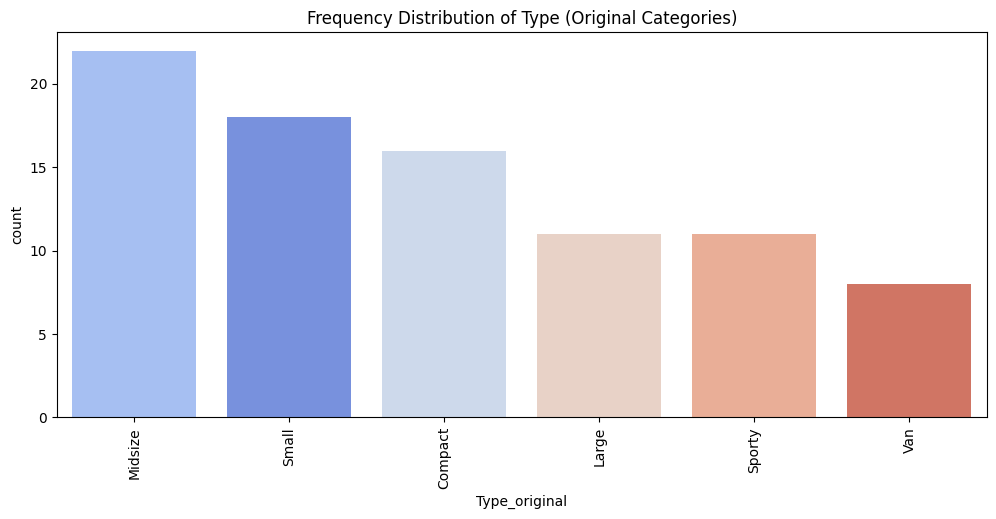

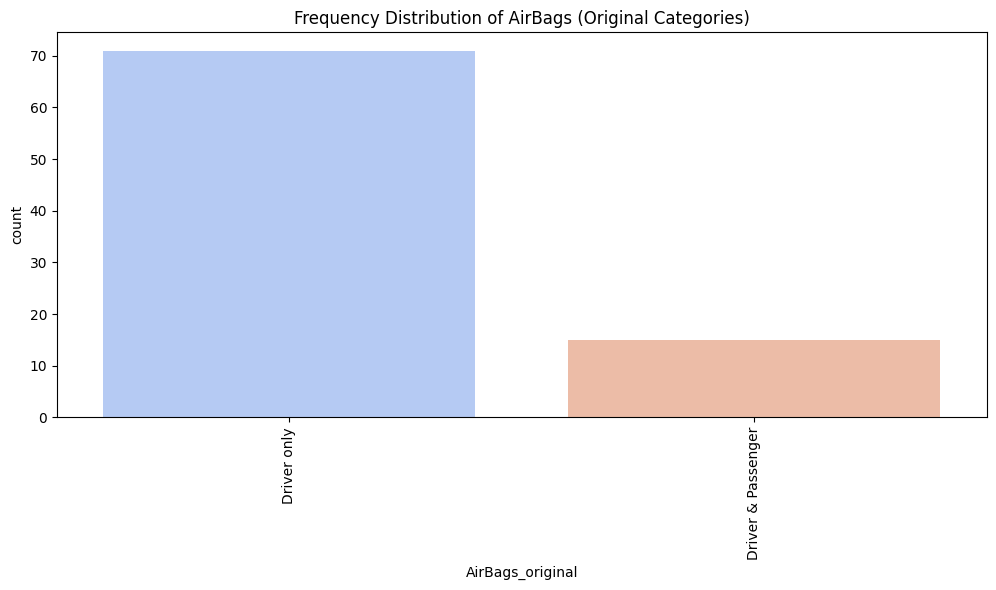

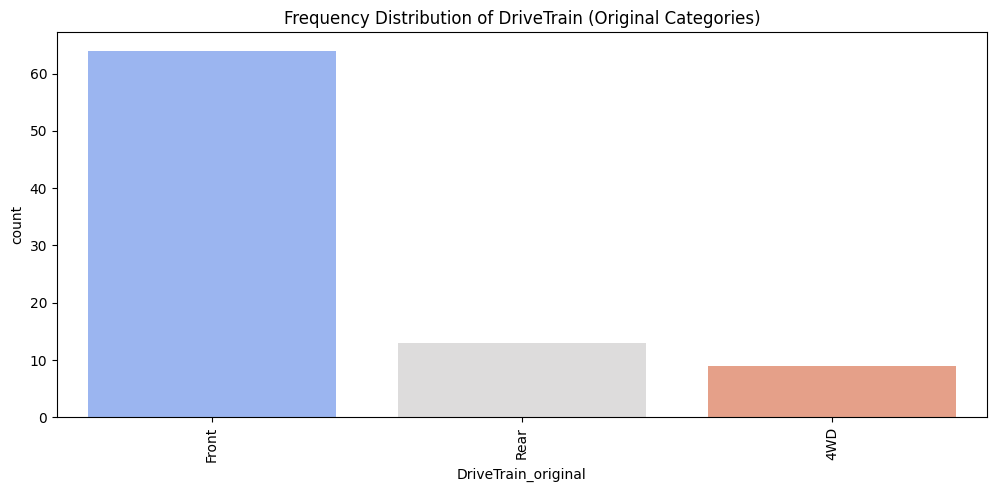

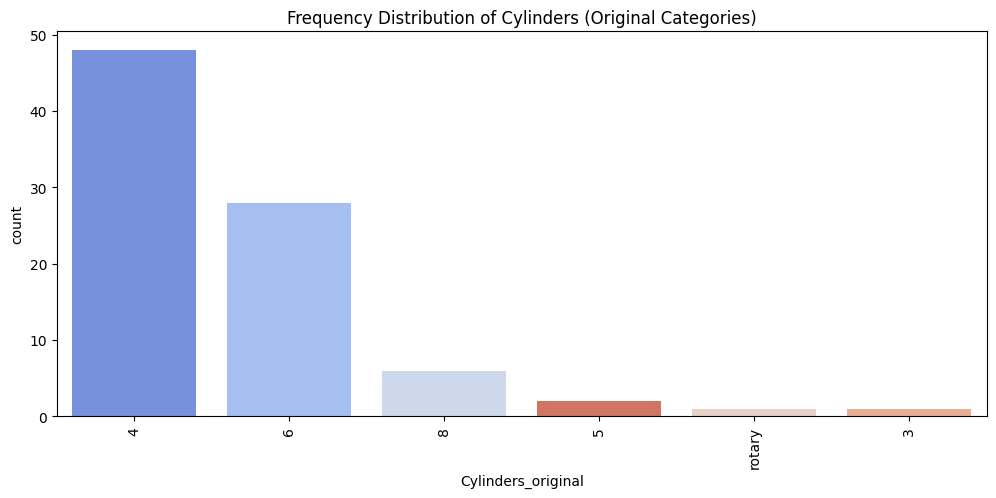

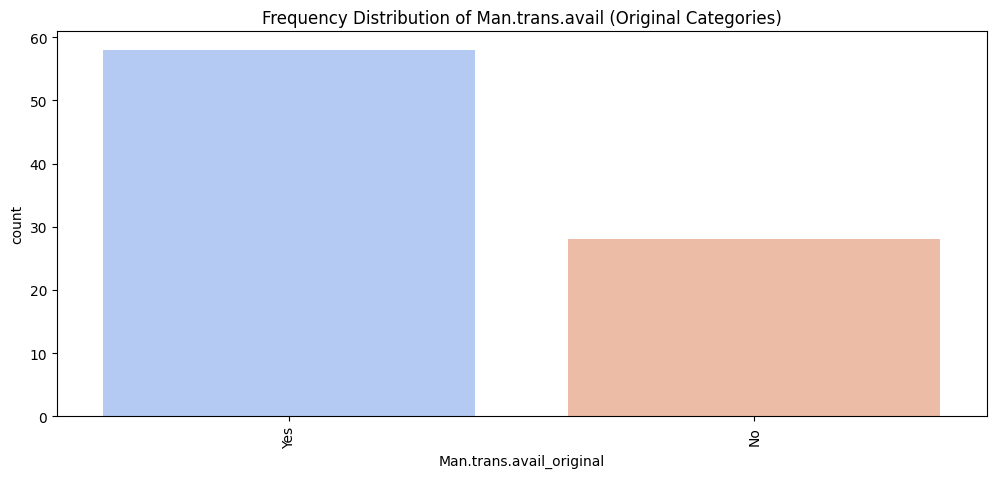

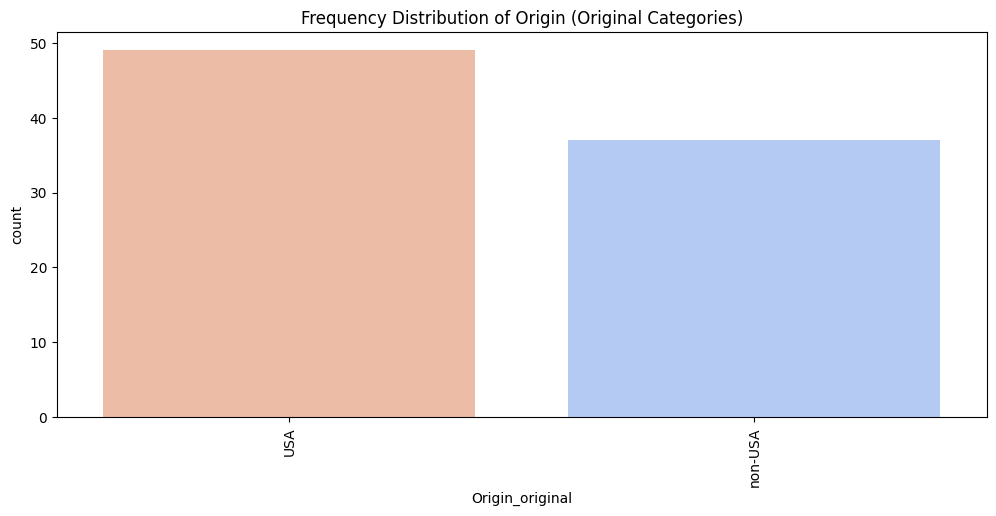

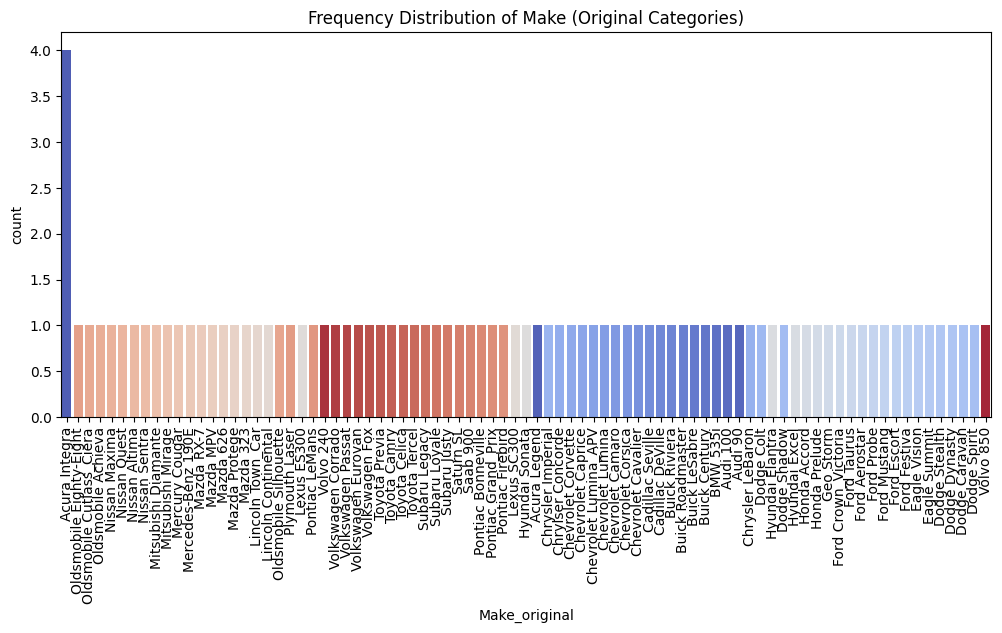

In [12]:
# Frequency distributions for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=df[col + "_original"], hue=df[col + "_original"], palette='coolwarm', legend=False, order=df[col + "_original"].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Frequency Distribution of {col} (Original Categories)")
    plt.show()

# 10. Bivariate Analysis

## Correlation Heatmap
Displays relationships between variables using a heatmap.

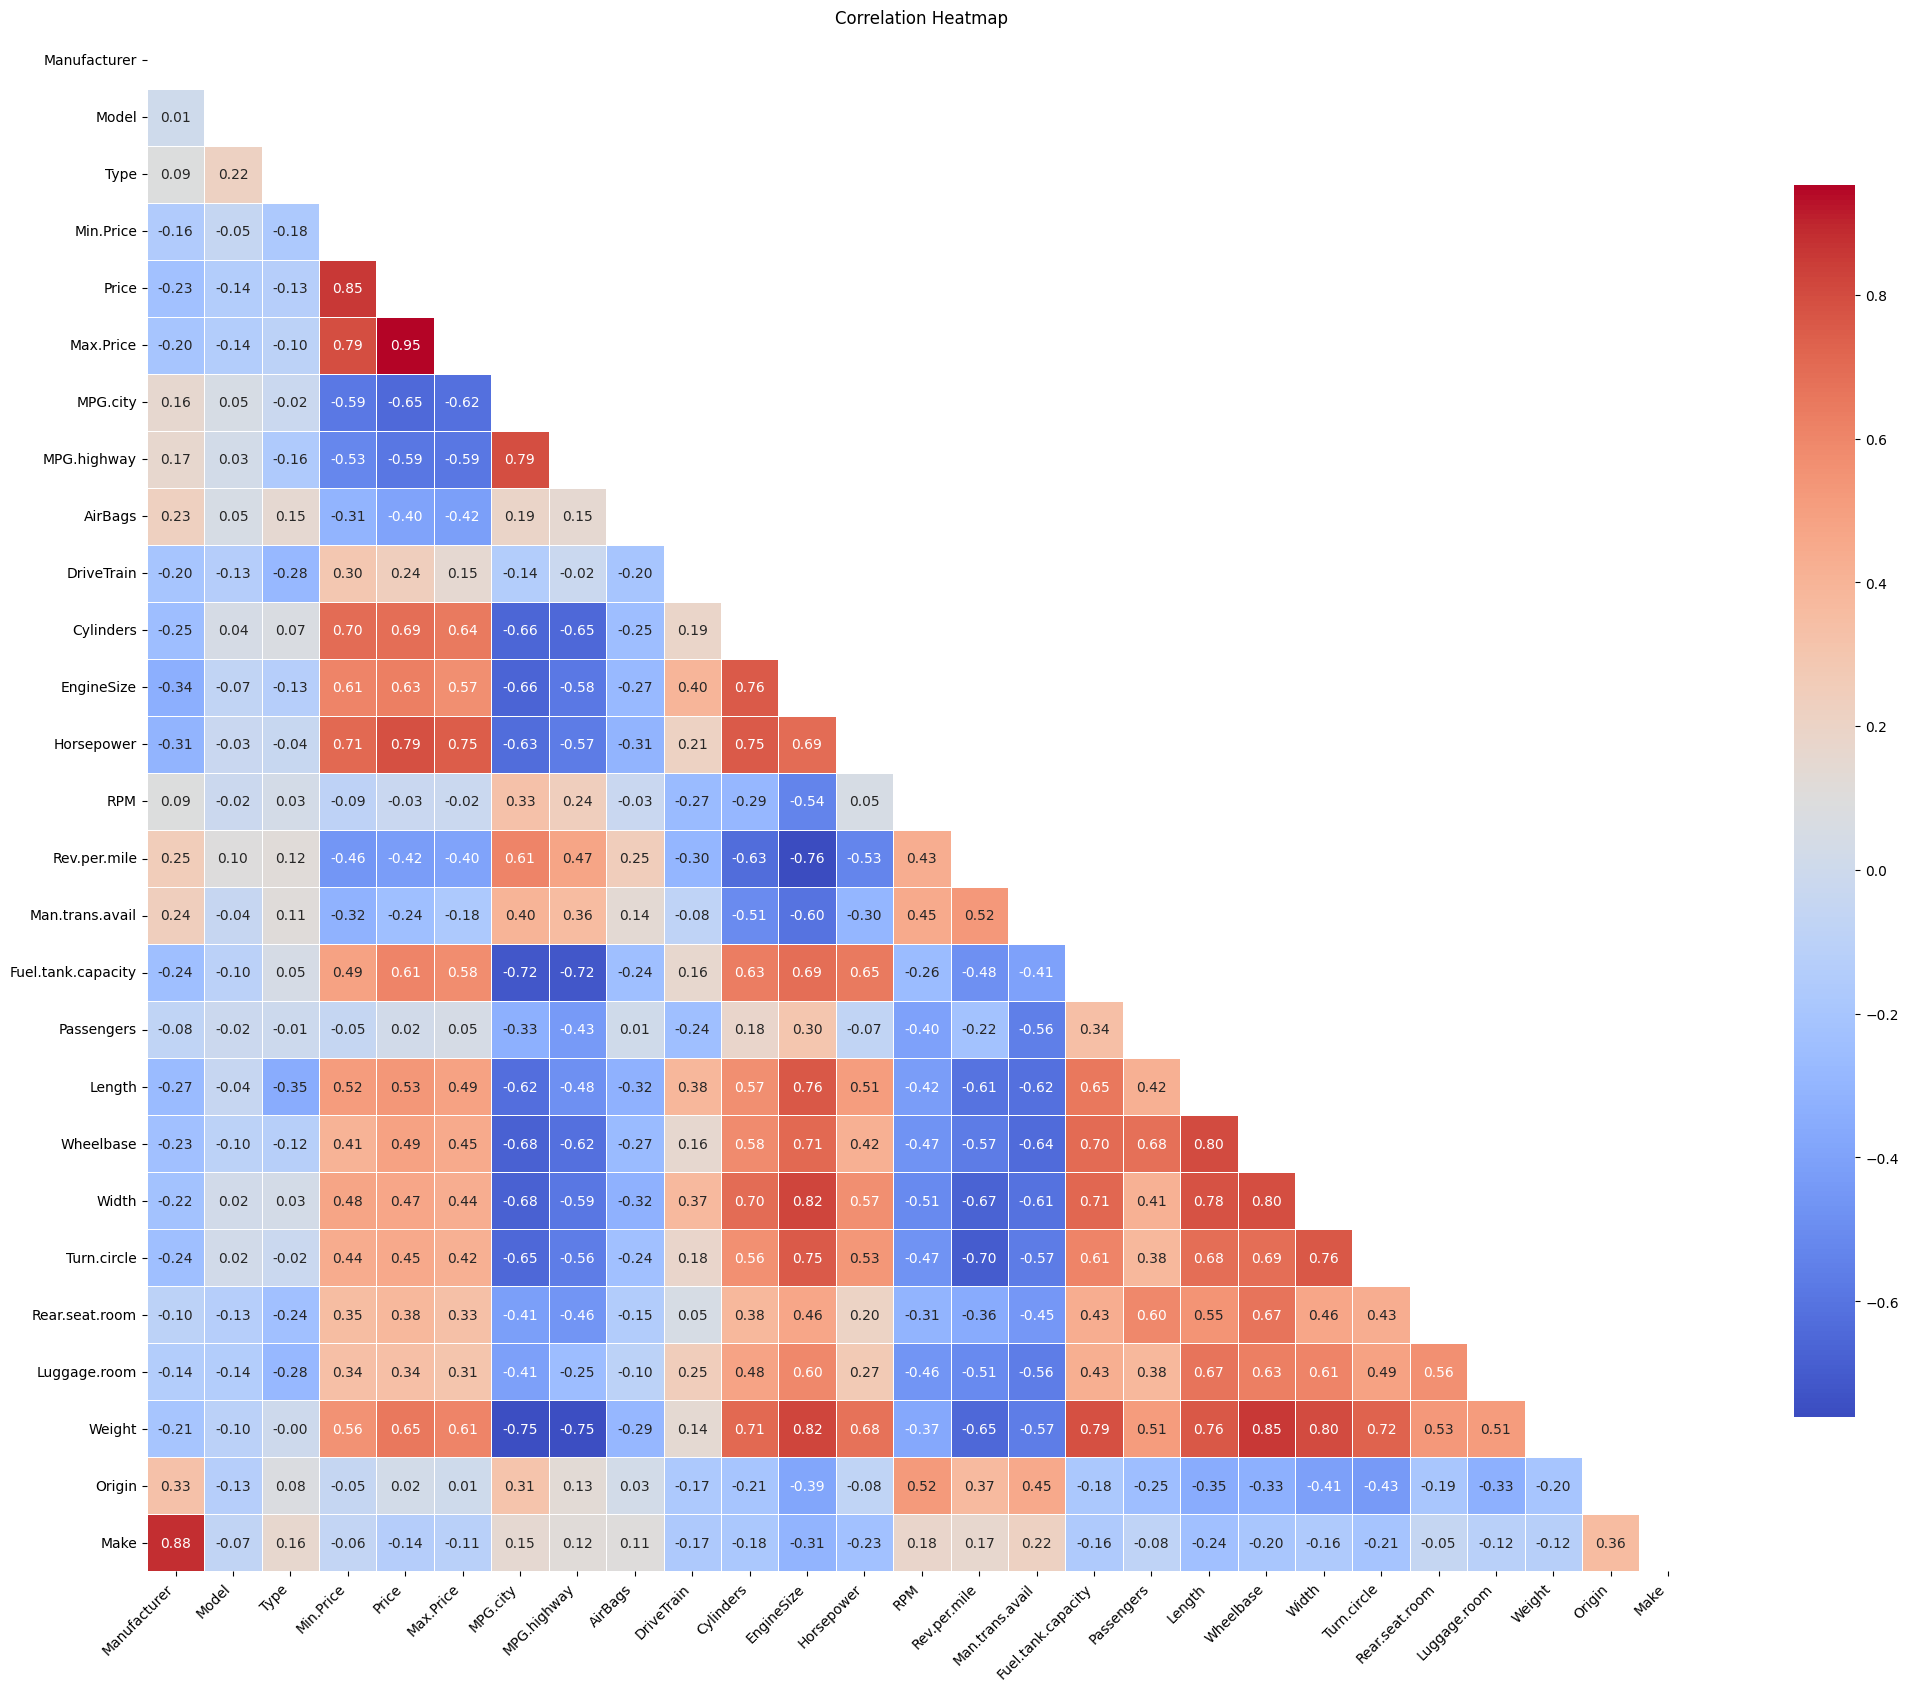

In [13]:
# Bivariate Analysis
# Correlation Matrix
plt.figure(figsize=(25,20))  # Increased size for readability
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## Scatter Plot with Regression Line
Scatter plots with regression lines for relationships between key variables.

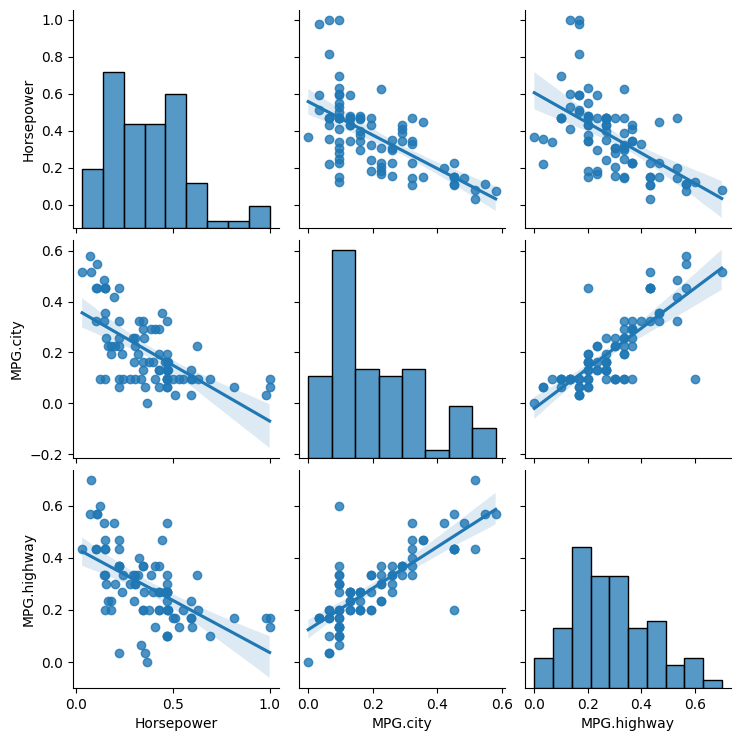

In [14]:
# Scatter Plot with Regression Line
sns.pairplot(df, vars=["Horsepower", "MPG.city", "MPG.highway"], kind='reg')
plt.show()

## Bar Plots, Violin Plots, and Box Plots
Violin Plot: Shows data distribution and density.<br>

Box Plot: Highlights median, quartiles, and outliers.<br>

Bar Plot: Displays average medv per category

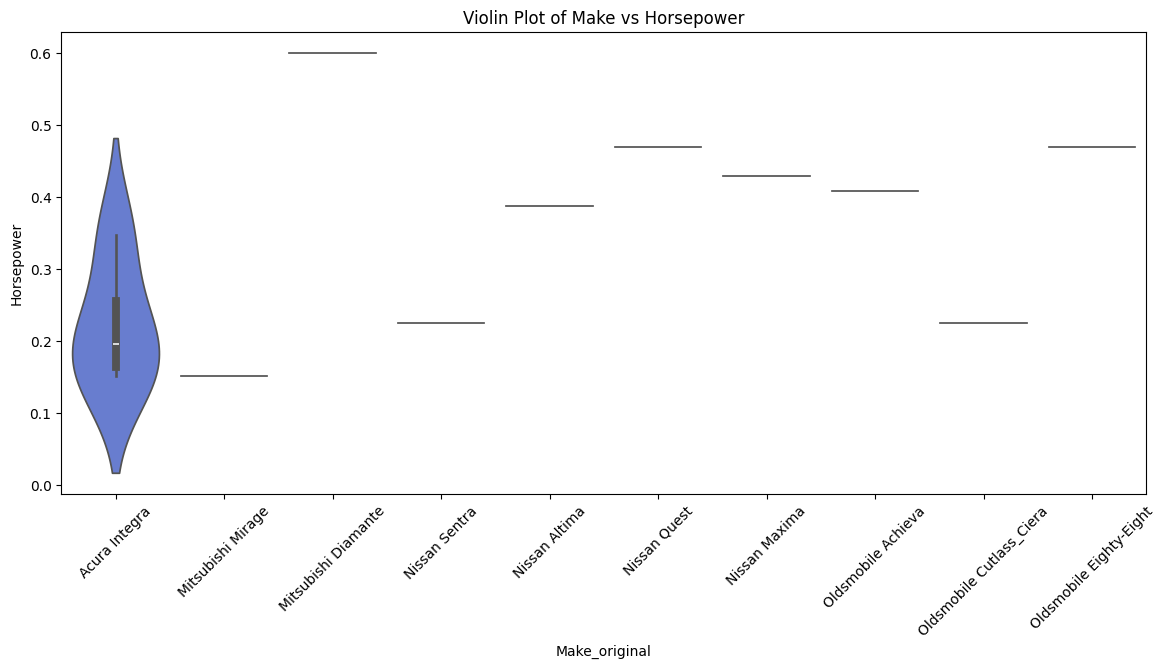

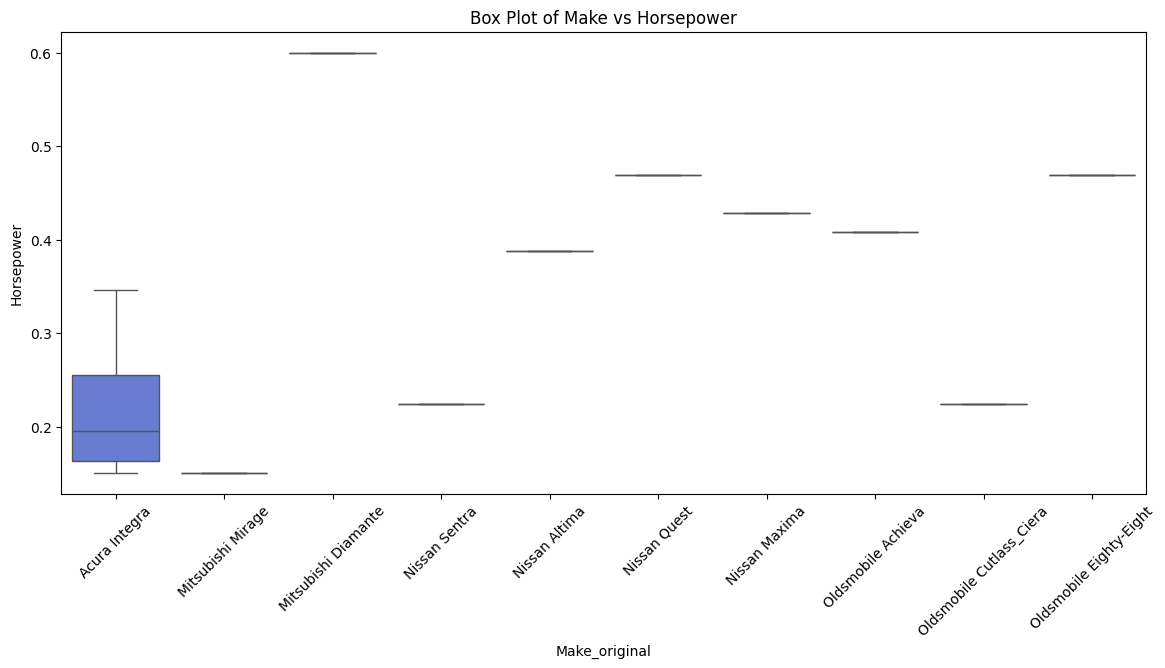

In [15]:
# Bar plots, Violin plots, and Box plots for categorical-numerical relationships
# Limiting categories to top 10 most frequent
top_makes = df['Make_original'].value_counts().index[:10]
df_filtered = df[df['Make_original'].isin(top_makes)]

plt.figure(figsize=(14, 6))
sns.violinplot(x=df_filtered['Make_original'].astype(str), y=df_filtered['Horsepower'], hue=df_filtered['Make_original'].astype(str), palette='coolwarm', legend=False)
plt.title("Violin Plot of Make vs Horsepower")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x=df_filtered['Make_original'].astype(str), y=df_filtered['Horsepower'], hue=df_filtered['Make_original'].astype(str), palette='coolwarm', legend=False)
plt.title("Box Plot of Make vs Horsepower")
plt.xticks(rotation=45)
plt.show()

# 11. Multivariate Analysis

## Pair Plots
Displays relationships between multiple variables simultaneously.

Visualizes the relationship between Horsepower, MPG.city, and Price in a 3D scatter plot.

<Figure size 1400x1400 with 0 Axes>

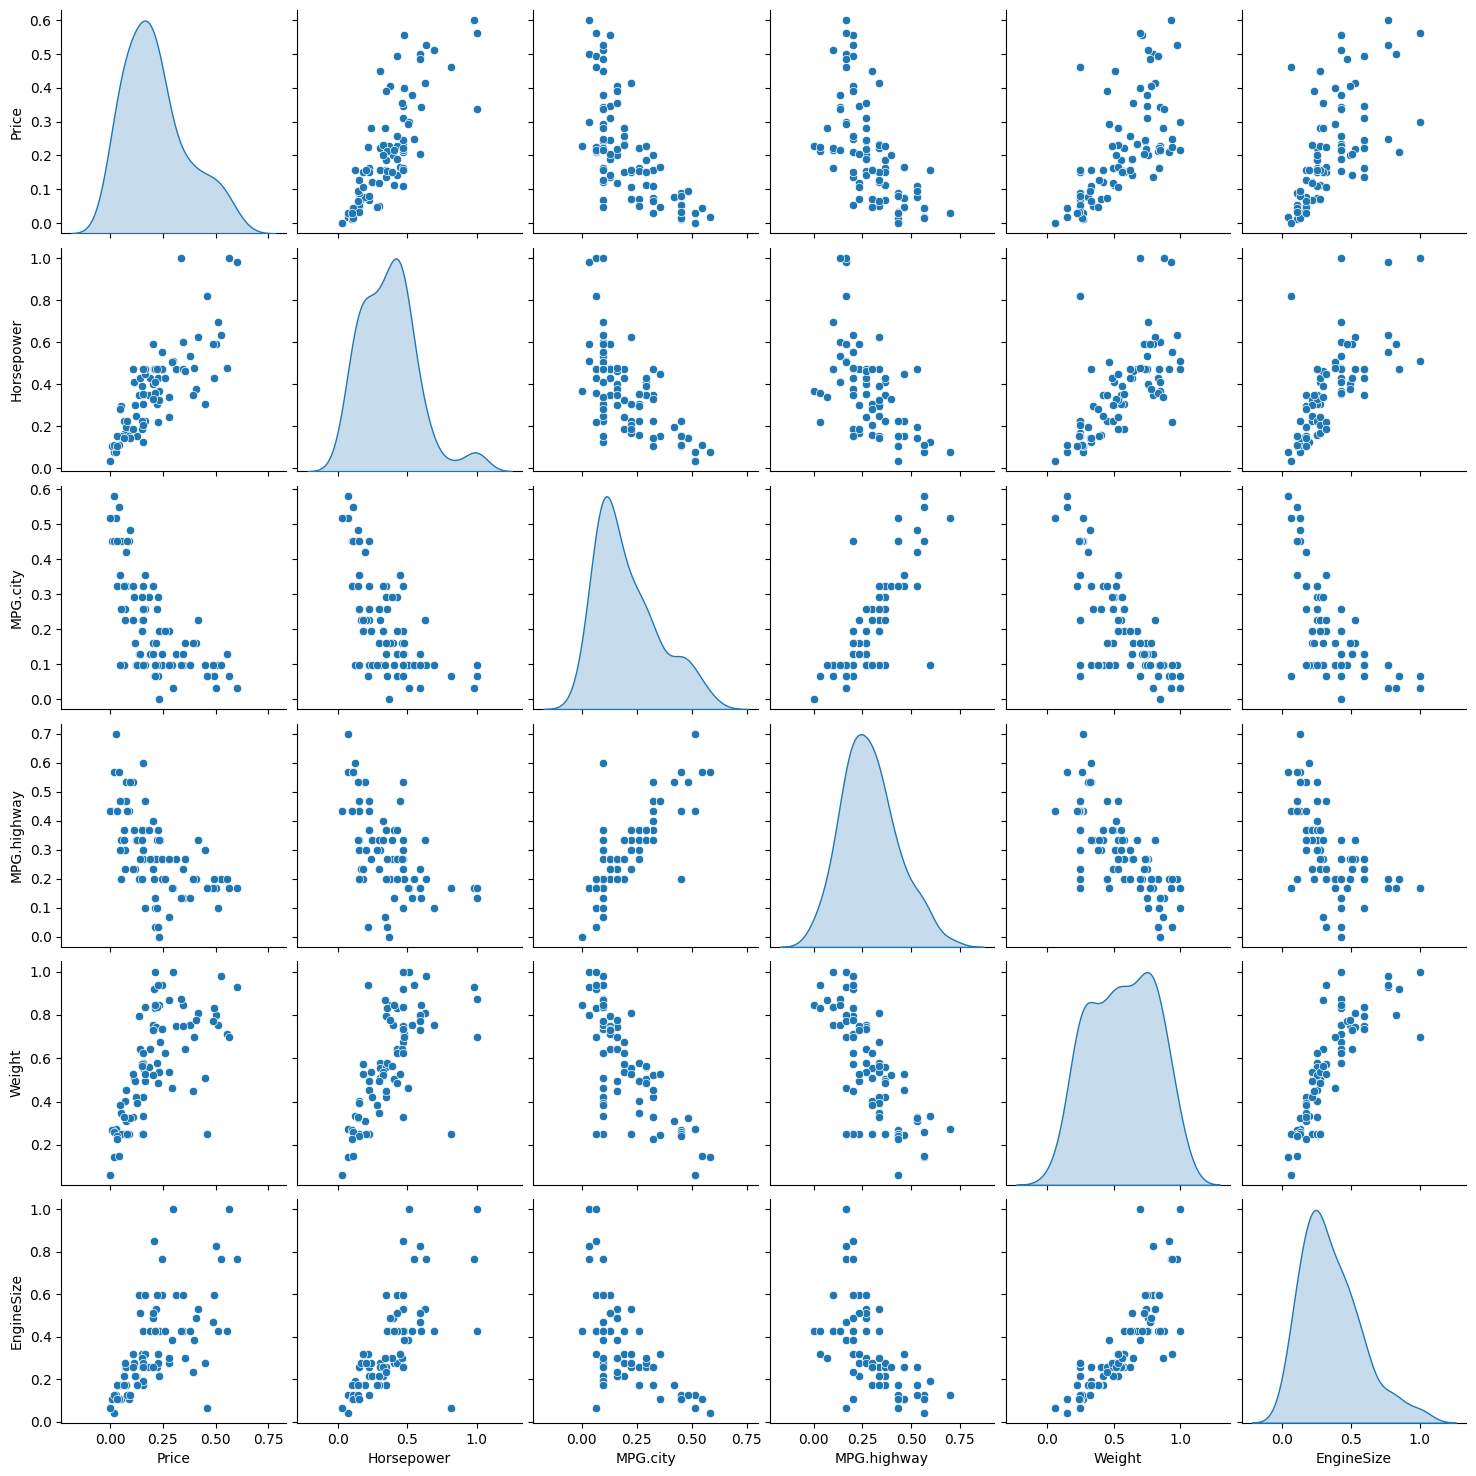

In [16]:
# Multivariate Analysis
# Pair Plots (Reducing congestion)
selected_features = ["Price", "Horsepower", "MPG.city", "MPG.highway", "Weight", "EngineSize"]
sample_size = min(100, len(df))
plt.figure(figsize=(14, 14))
sns.pairplot(df[selected_features].sample(n=sample_size, random_state=42), diag_kind='kde')
plt.show()

## 3D Scatter Plot
A 3D scatter plot visualizing relationships between three variables.

In [17]:
# Advanced Visualization: 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(x=df['Horsepower'], y=df['MPG.city'], z=df['Price'],
                                   mode='markers', marker=dict(size=5, color=df['Price'], colorscale='Viridis'))])
fig.update_layout(title="3D Scatter Plot: Horsepower vs MPG.city vs Price",
                  scene=dict(xaxis_title='Horsepower',
                             yaxis_title='MPG.city',
                             zaxis_title='Price'))
fig.show()

## Grouped Comparison Heatmap
Compares the average numerical values across different categories.

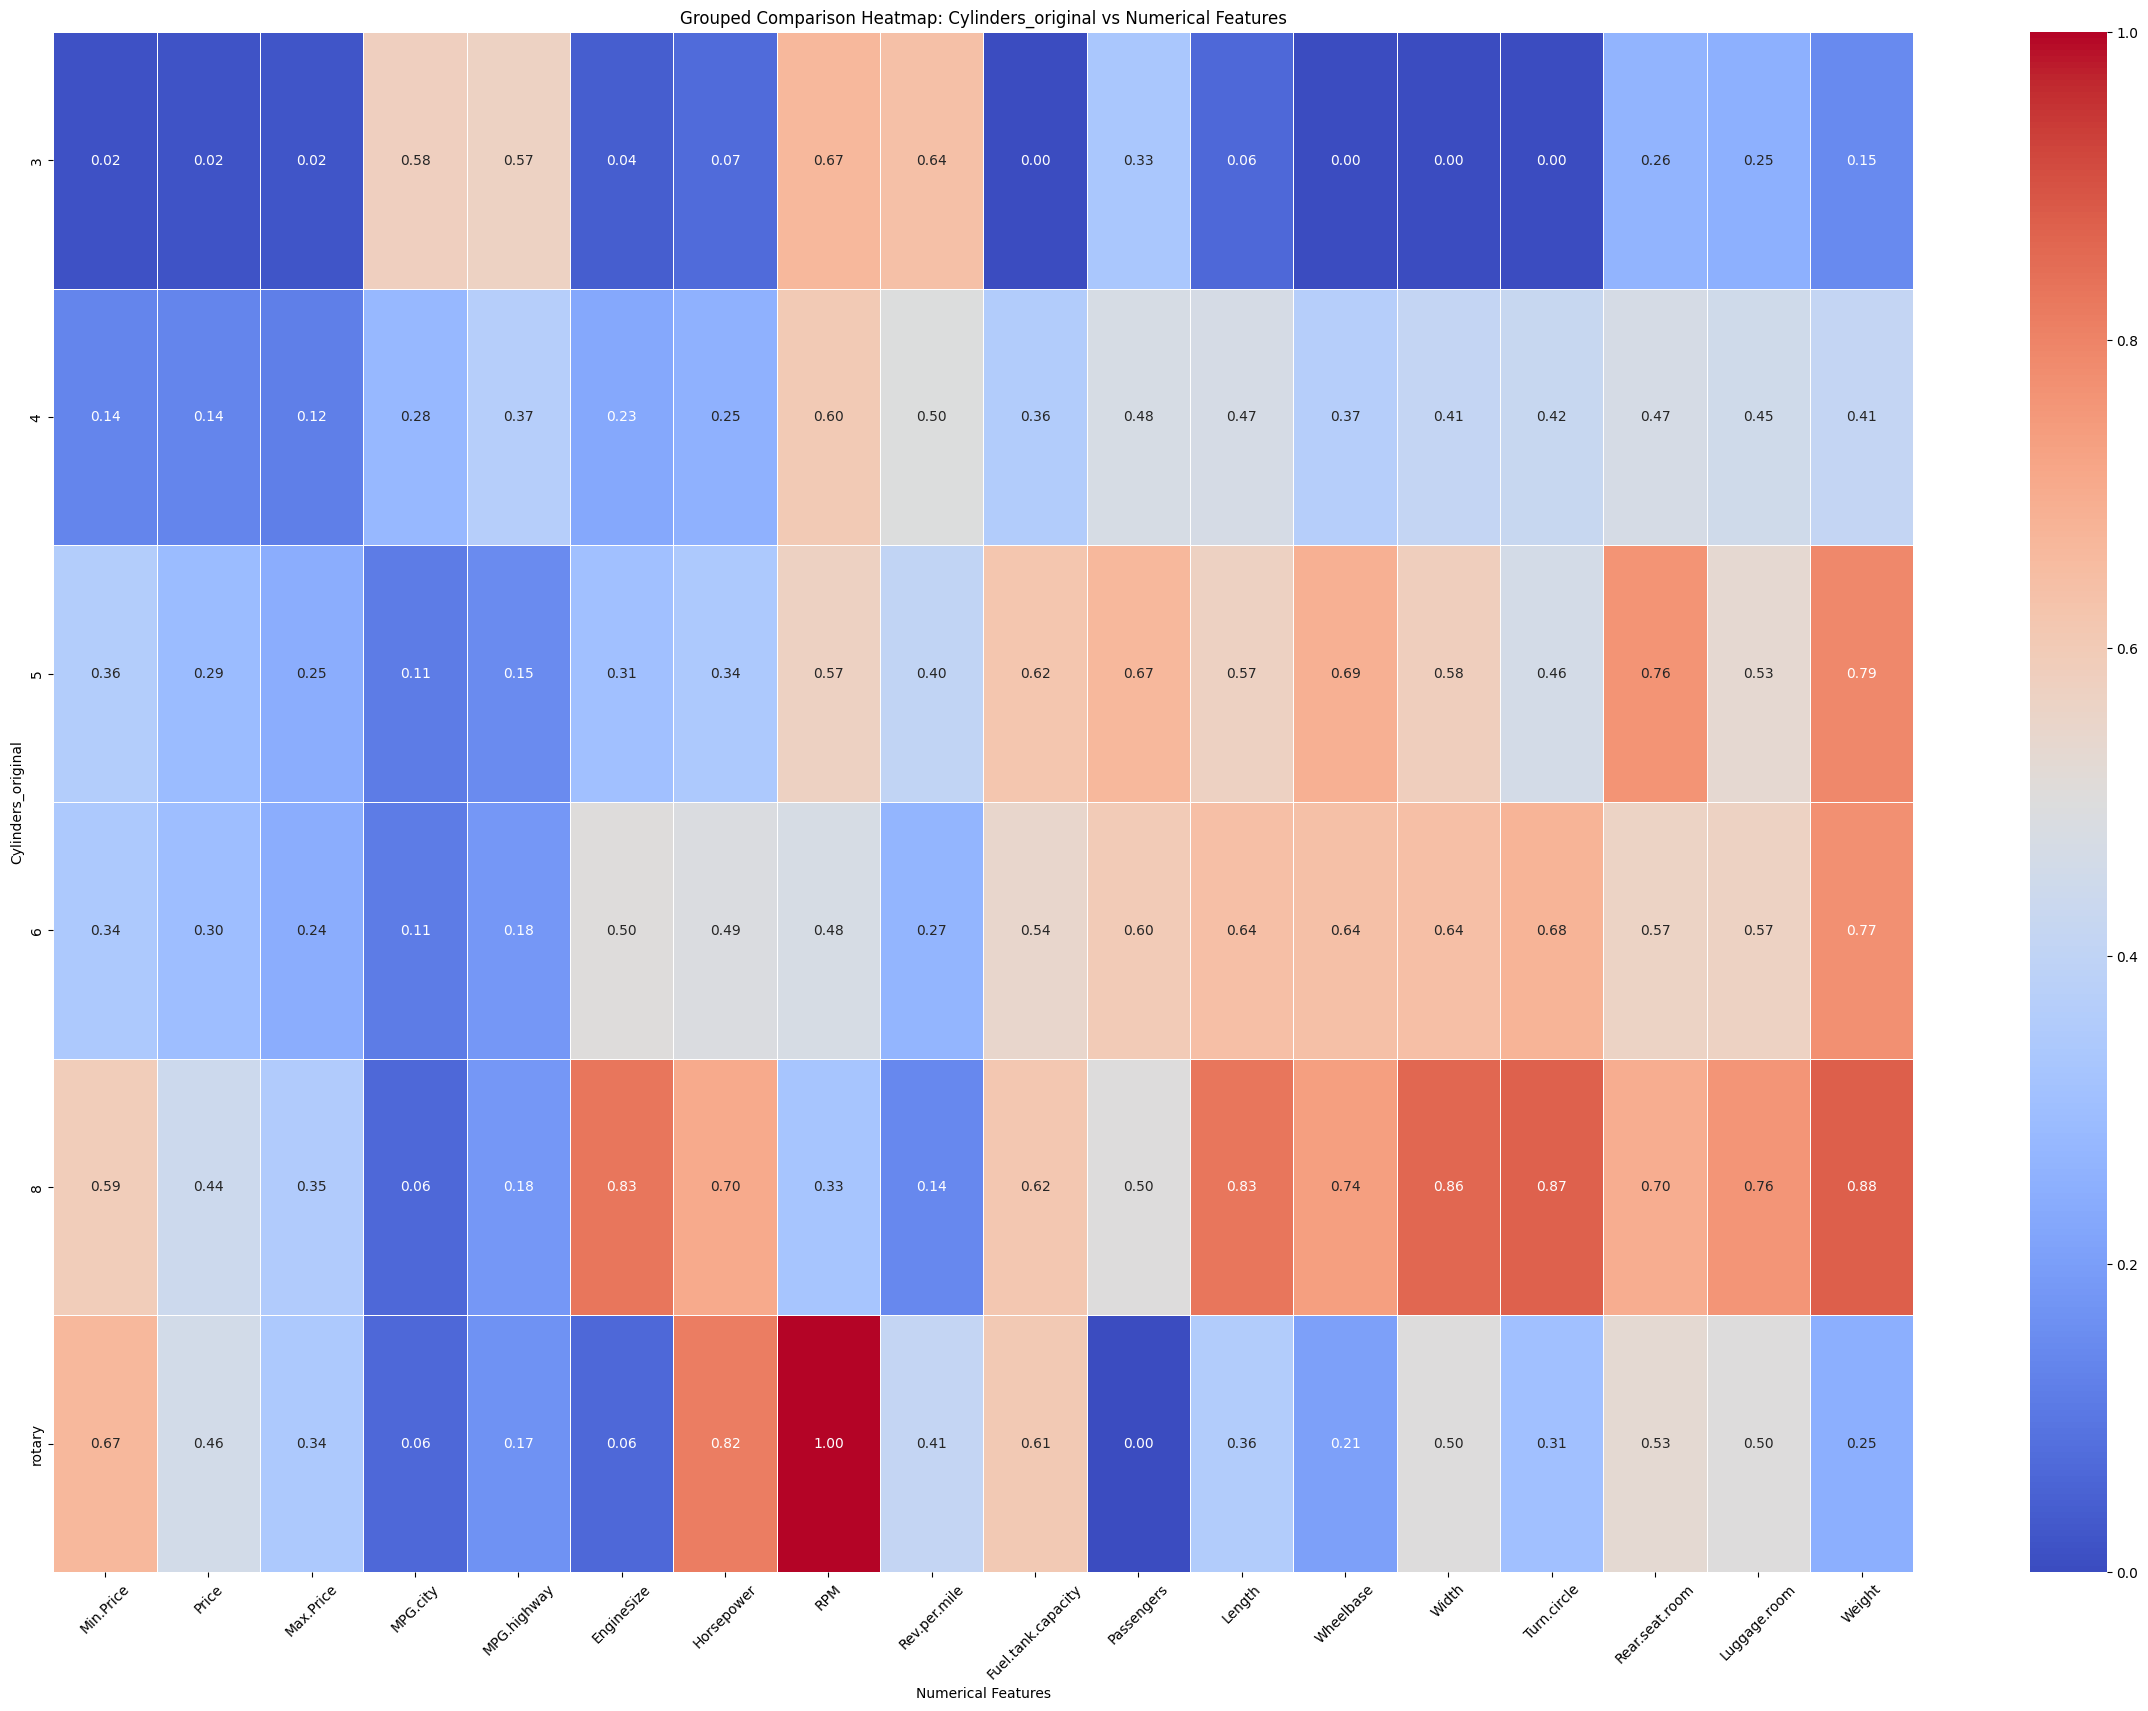

In [18]:
# Grouped Comparison Heatmap
plt.figure(figsize=(30, 20))
categorical_feature = 'Cylinders_original' if 'Cylinders_original' in df.columns else categorical_cols[0]
avg_values = df.groupby(categorical_feature)[numeric_cols].mean()
sns.heatmap(avg_values, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title(f"Grouped Comparison Heatmap: {categorical_feature} vs Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel(categorical_feature)
plt.xticks(rotation=45)
plt.show()

# 12. Feature Engineering
Creates a new feature, power_to_weight, to measure engine efficiency.

In [19]:
# Feature Engineering: Creating new feature
# Power to Weight Ratio
df['power_to_weight'] = df['Horsepower'] / (df['Weight'] + 1)


# 13. Outlier Detection with Isolation Forest
Uses IsolationForest to detect and remove 5% of anomalous data points.

In [20]:
# Isolation Forest for Outlier Detection
# Ensure categorical columns are encoded
df_numeric = df.drop(columns=['Make_original'] + list(label_encoders.keys()))
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric

# Check if there are still non-numeric values
if df_numeric.isna().sum().sum() > 0:
    print("Warning: There are NaN values after conversion. Check categorical encoding.")

# Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df_numeric)

# Remove outliers
df = df[df['anomaly'] == 1].drop(columns=['anomaly'])


In [21]:
# Find columns that are not numeric
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['Manufacturer_original', 'Model_original', 'Type_original', 'AirBags_original', 'DriveTrain_original', 'Cylinders_original', 'Man.trans.avail_original', 'Origin_original', 'Make_original']


In [22]:
# Encode categorical variables that were missed
for col in non_numeric_cols:
    if col in label_encoders:
        df[col] = df[col].map(label_encoders[col])  # Use existing label encoder
    else:
        # If not in label_encoders, create a new encoding
        df[col] = df[col].astype('category').cat.codes

In [23]:
# Drop non-numeric columns again and apply Isolation Forest
df_numeric = df.drop(columns=['Make_original'] + list(label_encoders.keys()))
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df_numeric)

# Remove outliers
df = df[df['anomaly'] == 1].drop(columns=['anomaly'])

In [24]:
# Final Dataset Info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 92
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              77 non-null     int64  
 1   Model                     77 non-null     int64  
 2   Type                      77 non-null     int64  
 3   Min.Price                 77 non-null     float64
 4   Price                     77 non-null     float64
 5   Max.Price                 77 non-null     float64
 6   MPG.city                  77 non-null     float64
 7   MPG.highway               77 non-null     float64
 8   AirBags                   77 non-null     int64  
 9   DriveTrain                77 non-null     int64  
 10  Cylinders                 77 non-null     int64  
 11  EngineSize                77 non-null     float64
 12  Horsepower                77 non-null     float64
 13  RPM                       77 non-null     float64
 14  Rev.per.mile     